**Data Preprocessing:**

1.	Preprocess the dataset to handle missing values,remove outliers
and scale the features if necessary.

In [1]:
import pandas as pd    #import the libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
file_path =('/content/sample_data/EastWestAirlines.xlsx') #load the data set
data = pd.read_excel(file_path, sheet_name='data')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [4]:
#Statistical Summary
statistics = data.describe()
statistics.loc['mode'] = data.mode().iloc[0]
print(statistics)

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   
mode      1.000000  1.000000e+03      0.000000     1.000000     1.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.96782

In [5]:
# Check for missing values
print("Missing values before imputation:\n", data.isnull().sum())
#No missing values found

Missing values before imputation:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

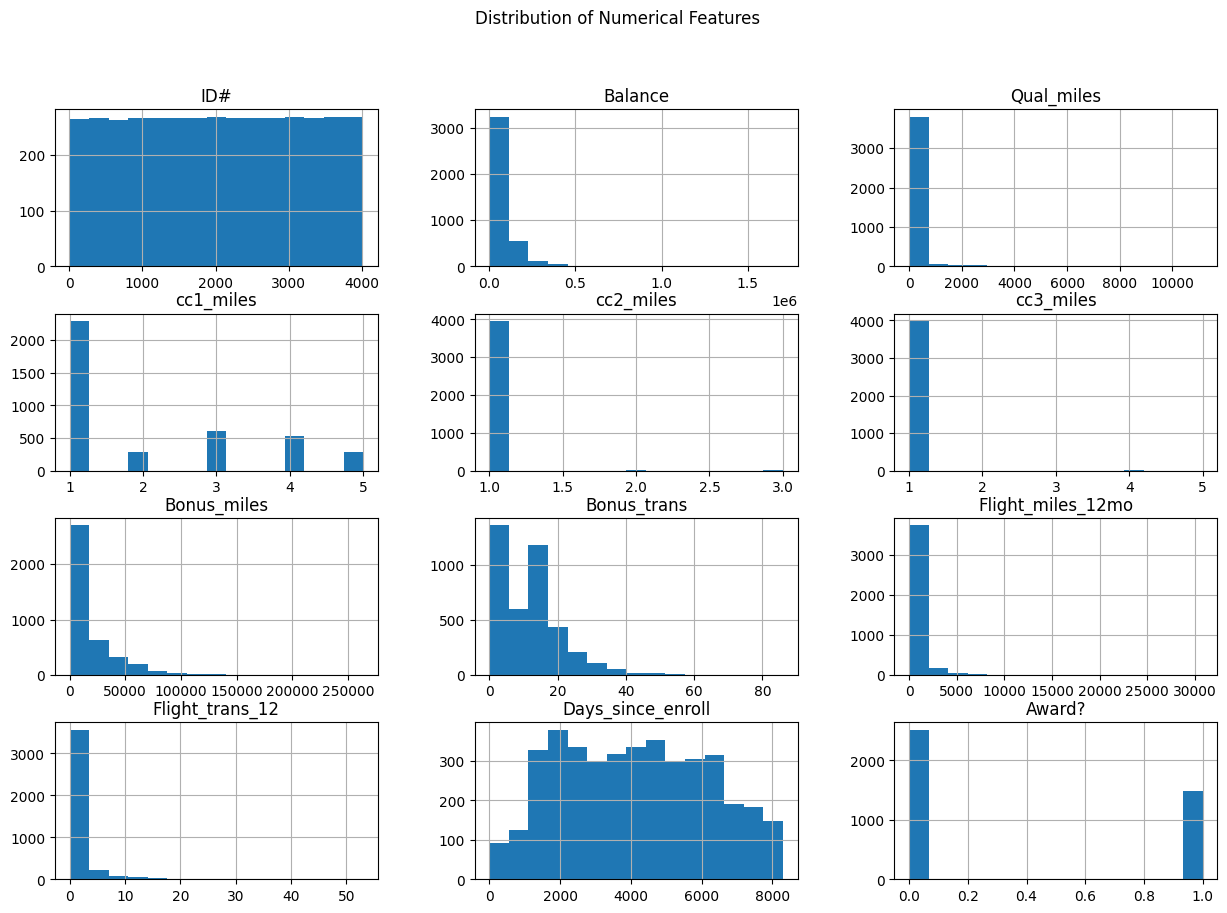

In [6]:
#2.Distribution of Numerical Features
import matplotlib.pyplot as plt # Import the matplotlib library
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

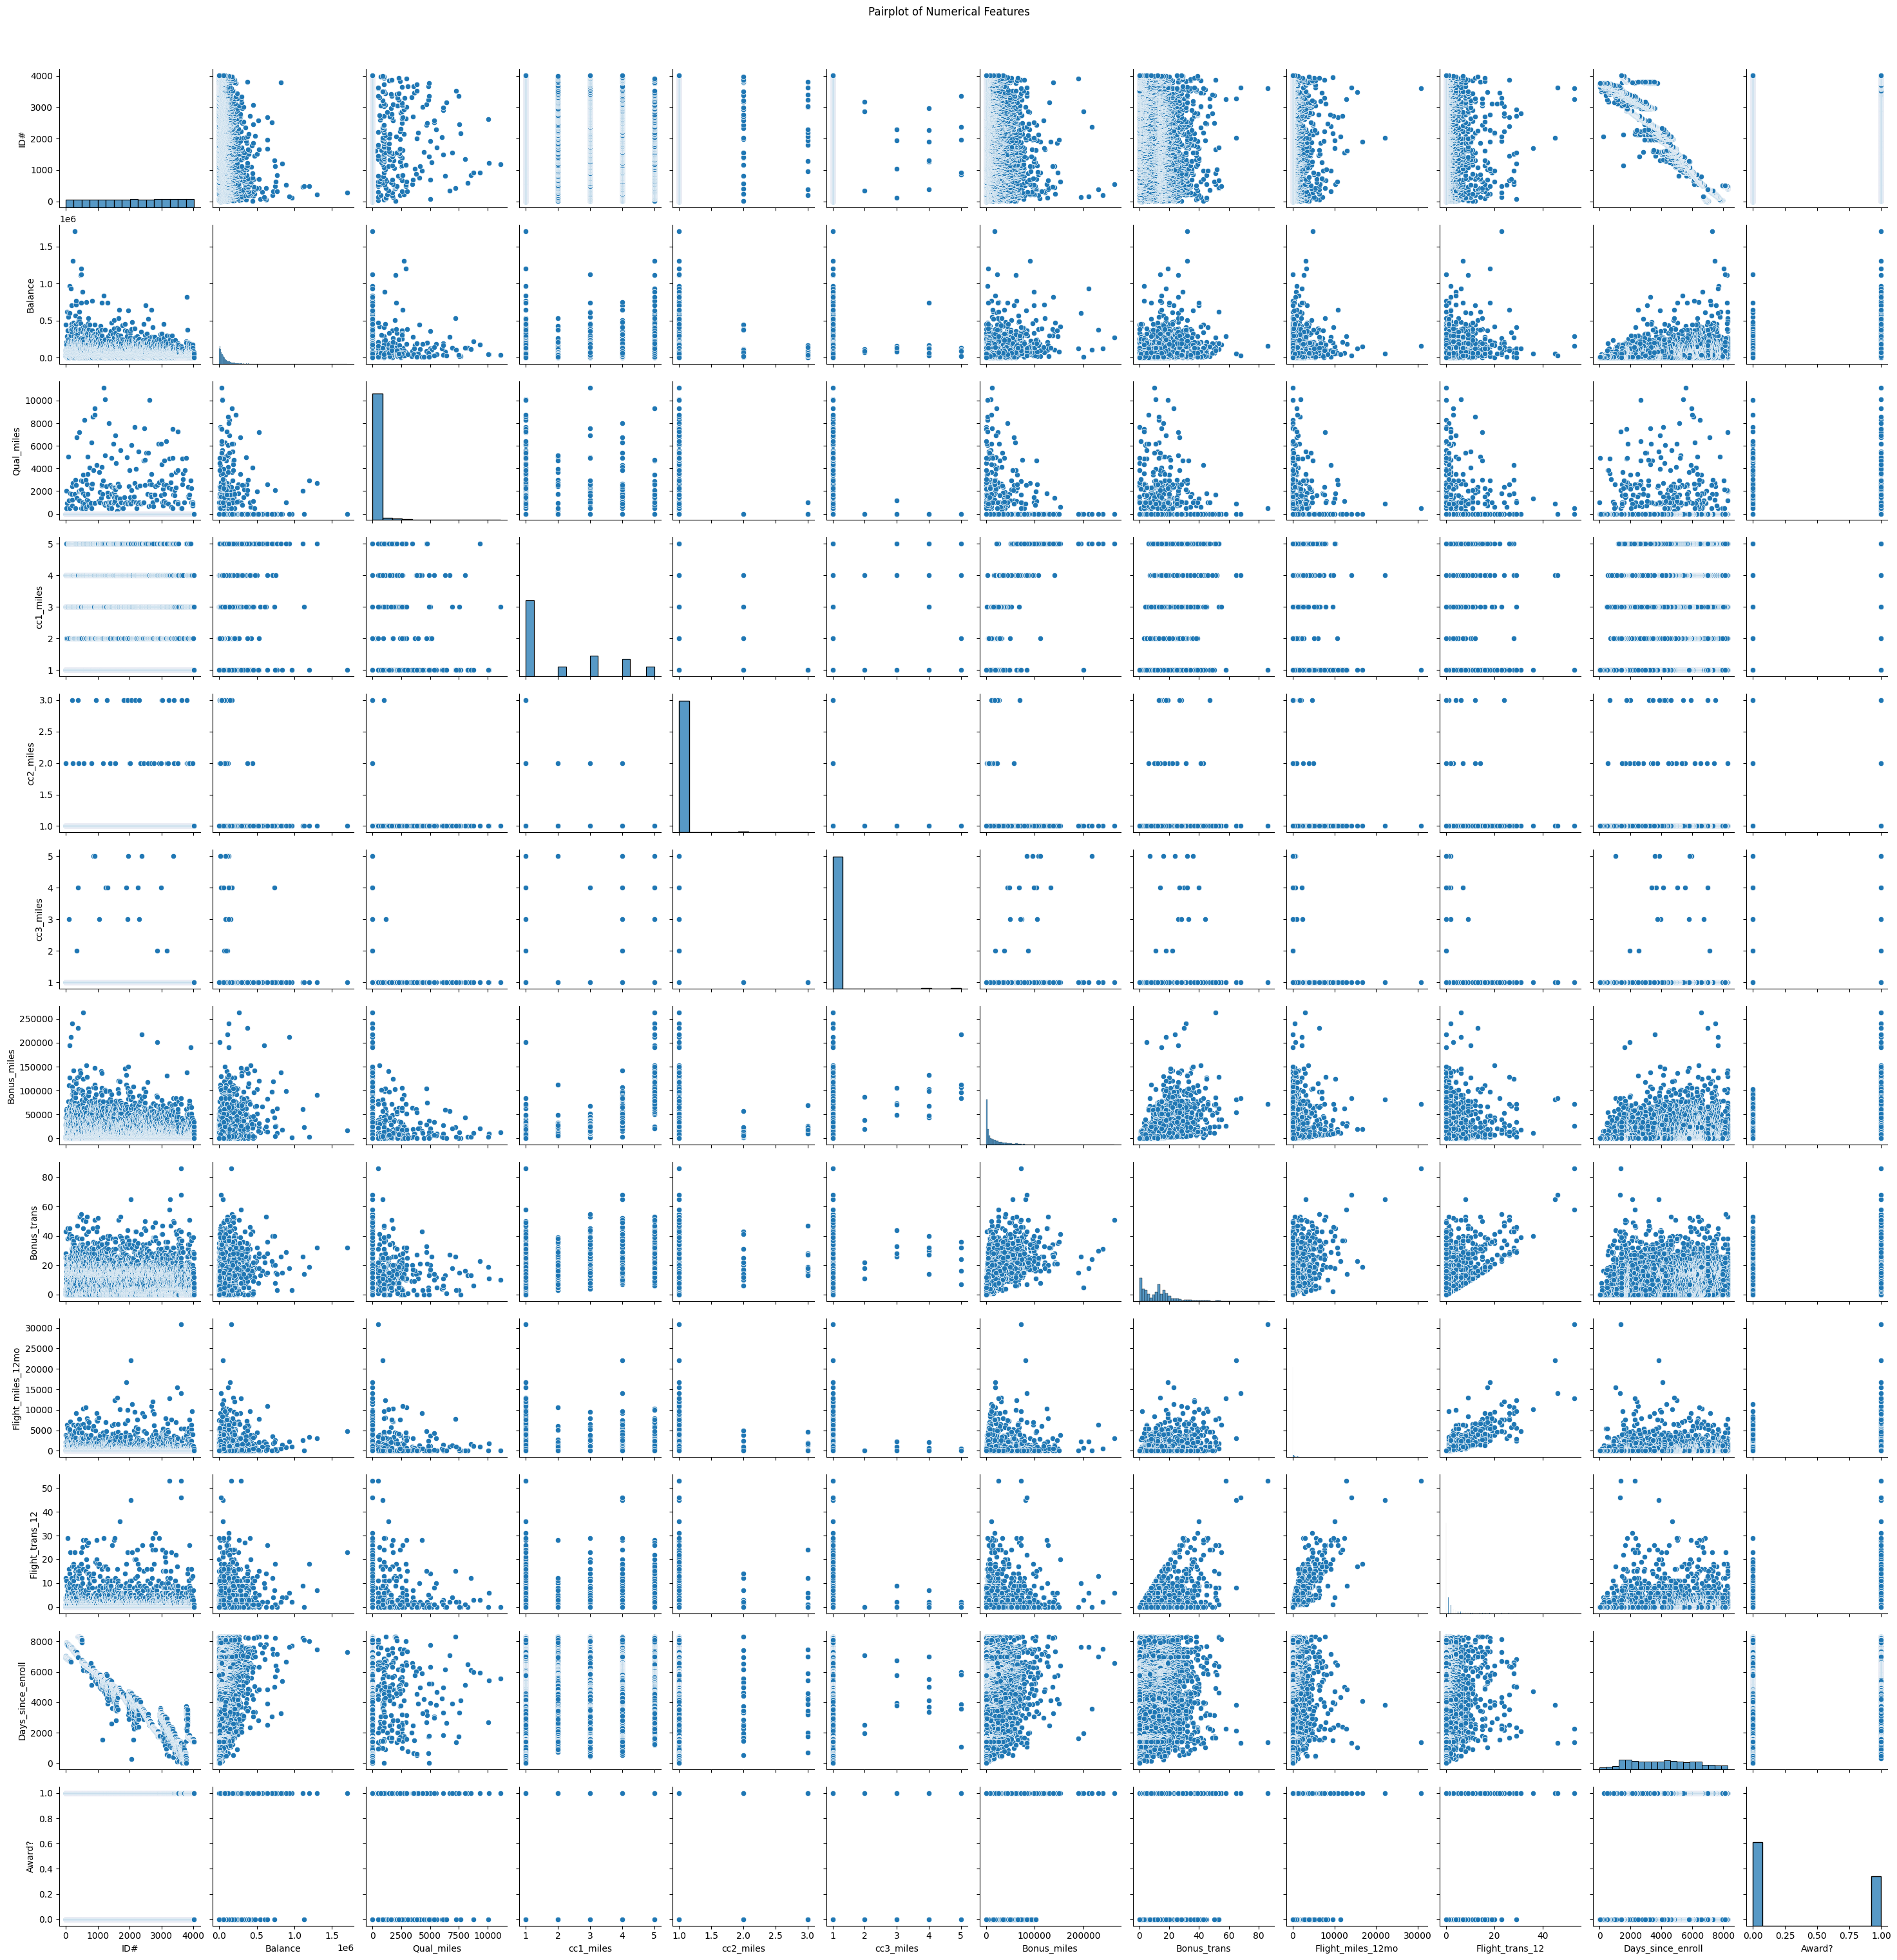

In [7]:
#3.Pairplot to visualize relationships
import seaborn as sns # Import the seaborn library
sns.pairplot(data[numeric_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

3.Multiple visualizations to understand the hidden patterns in the dataset






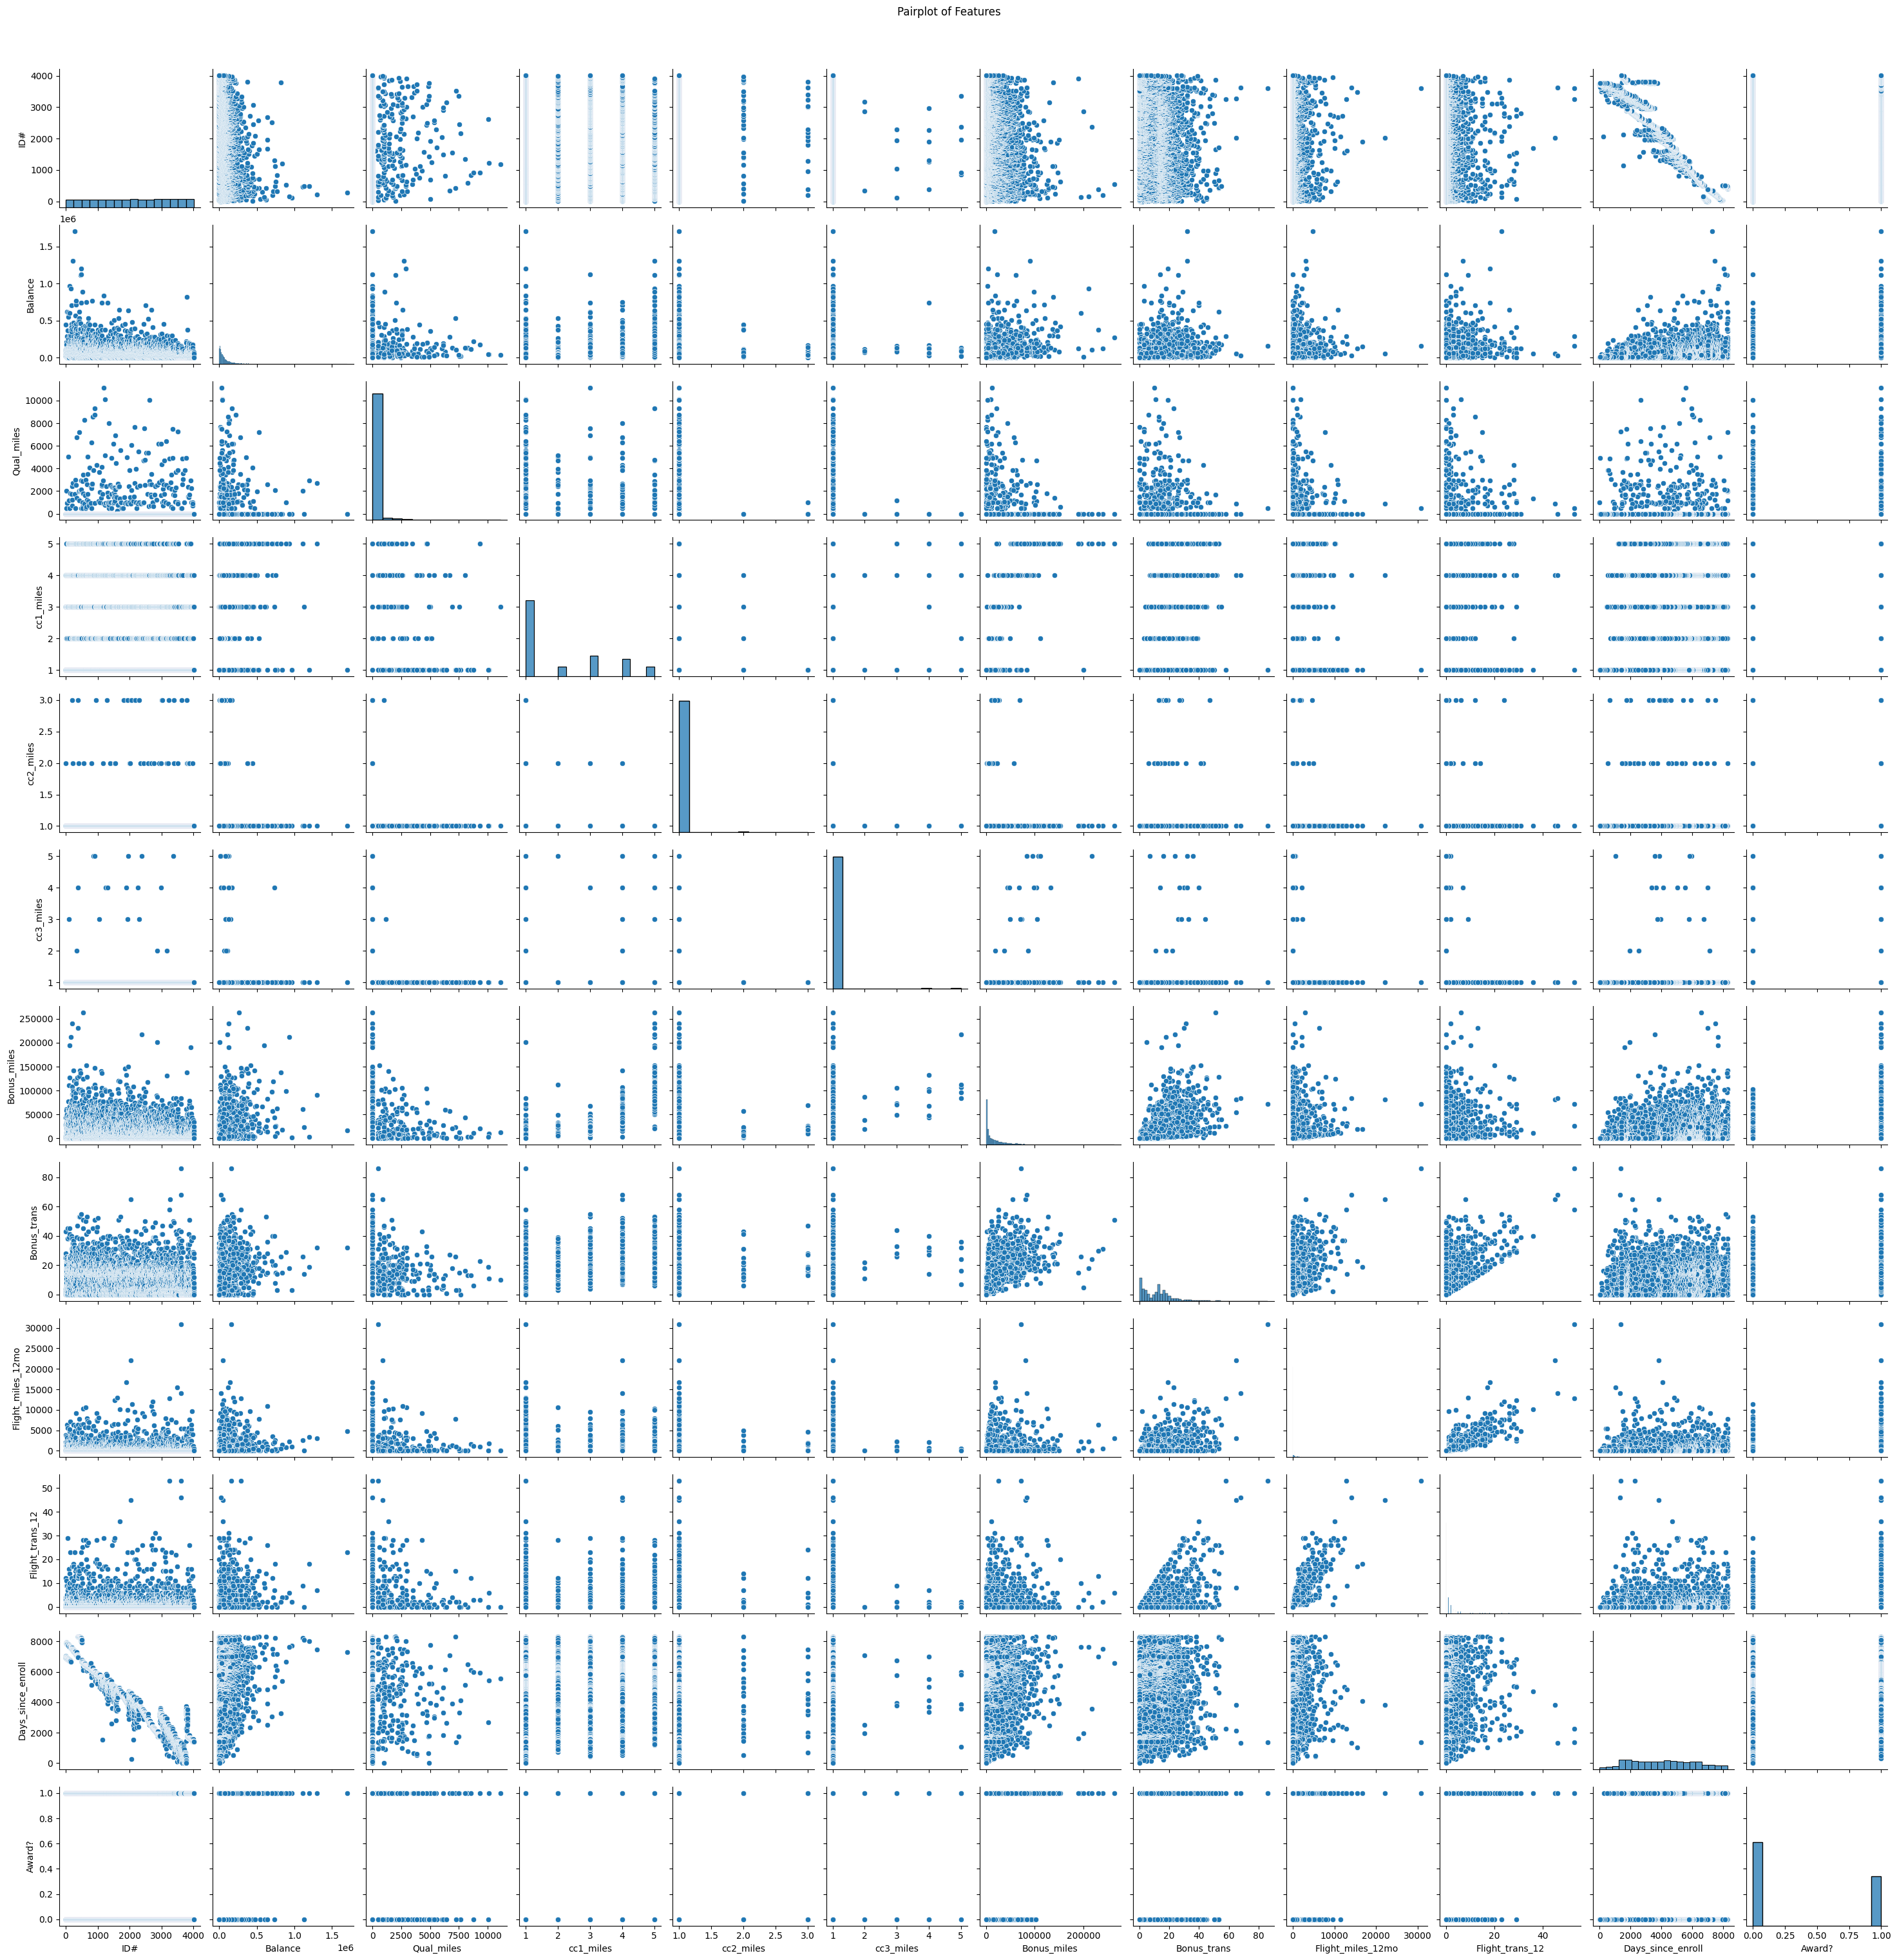

In [8]:
#Pair plot
sns.pairplot(data)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

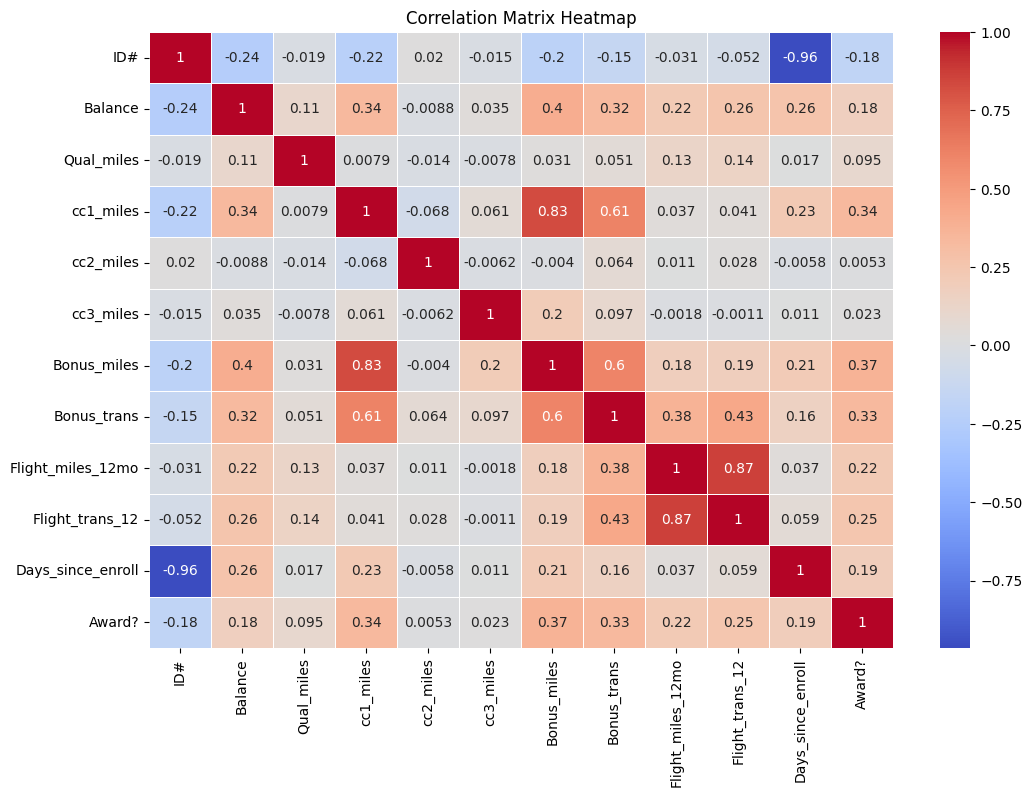

In [9]:
#HeatMap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

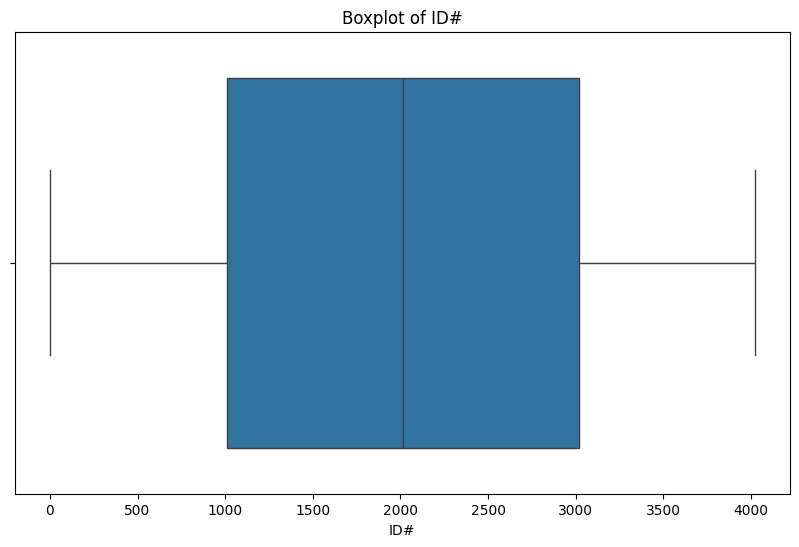

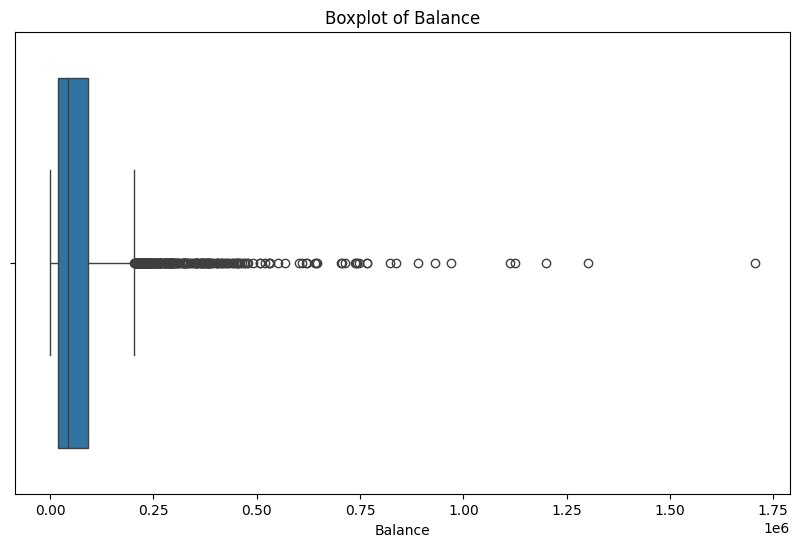

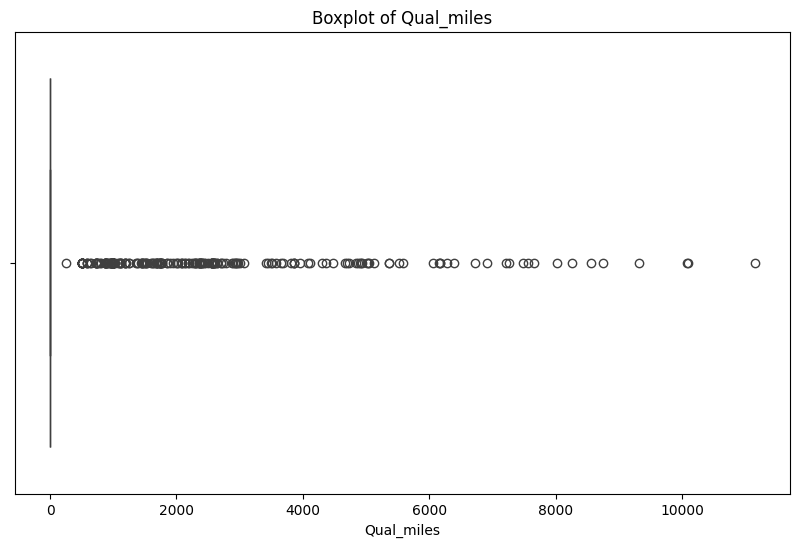

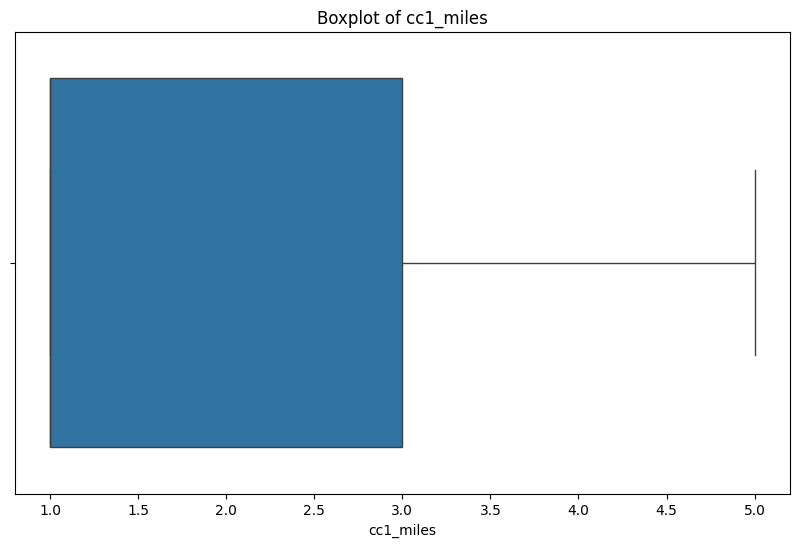

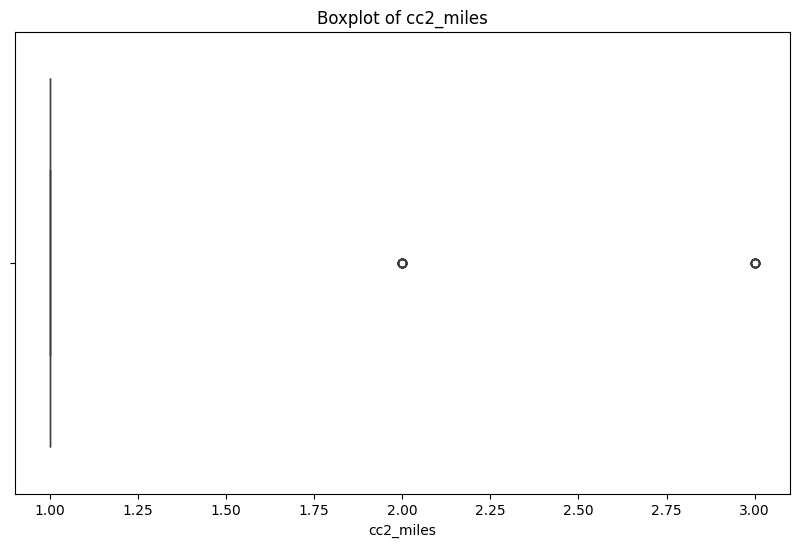

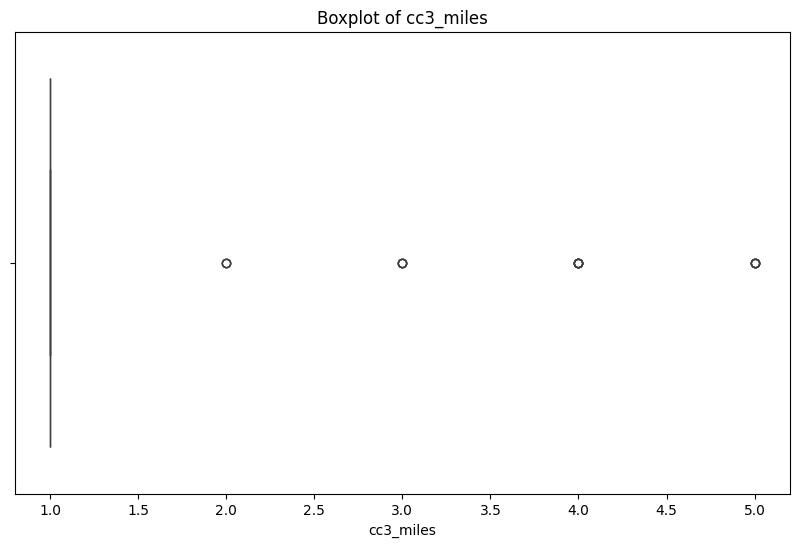

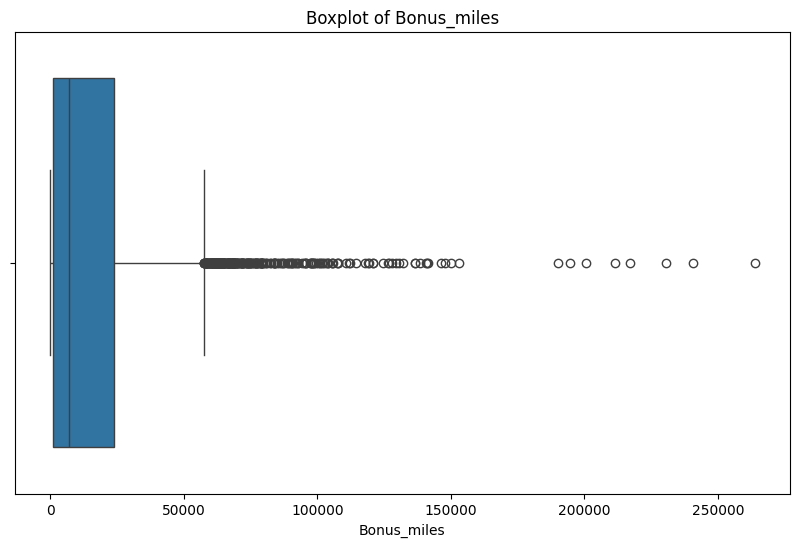

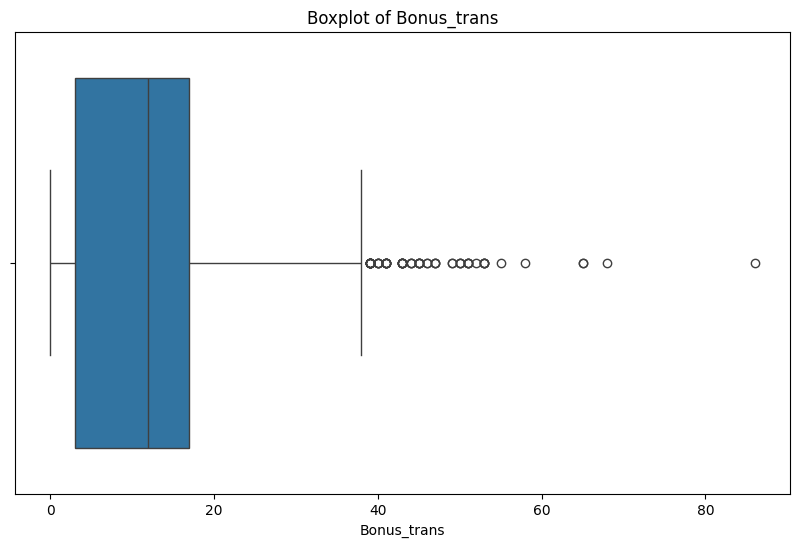

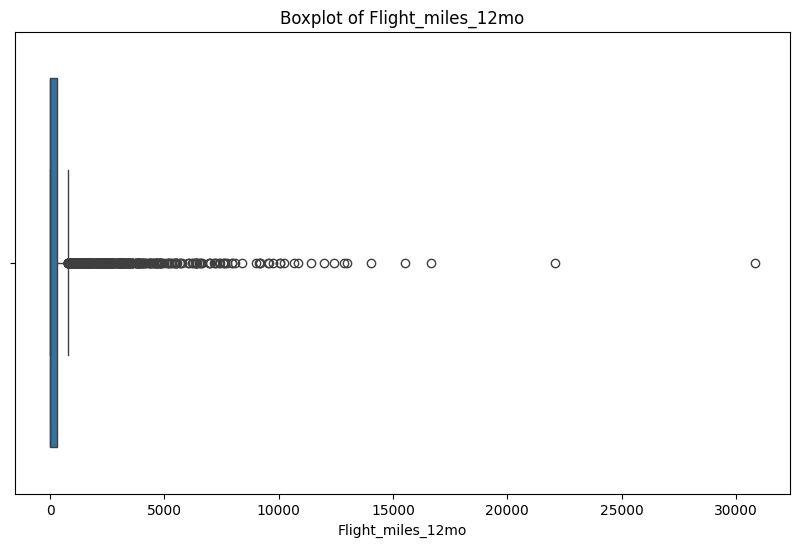

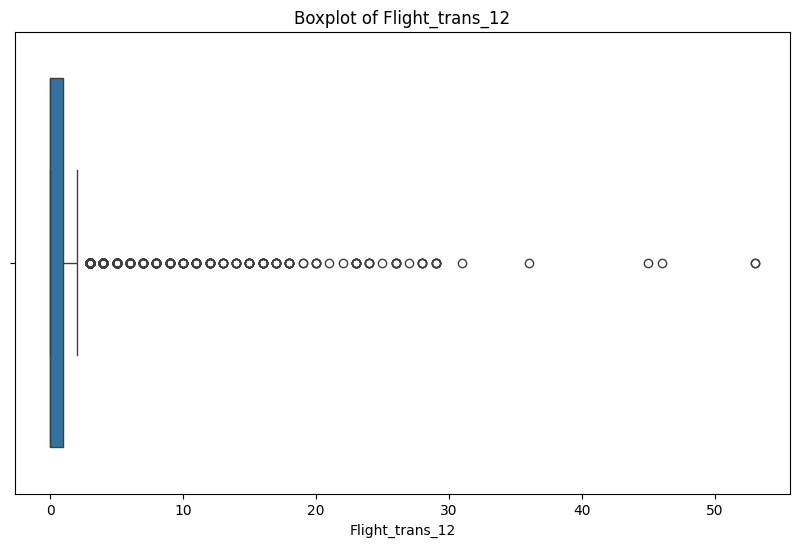

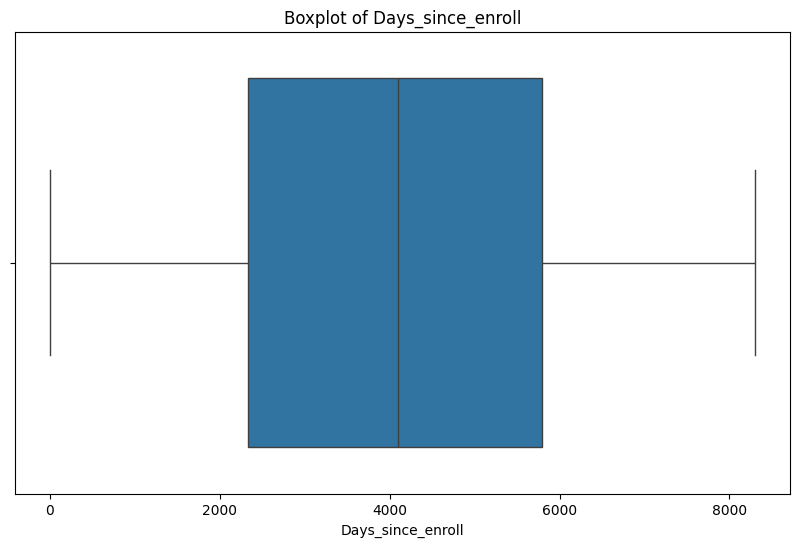

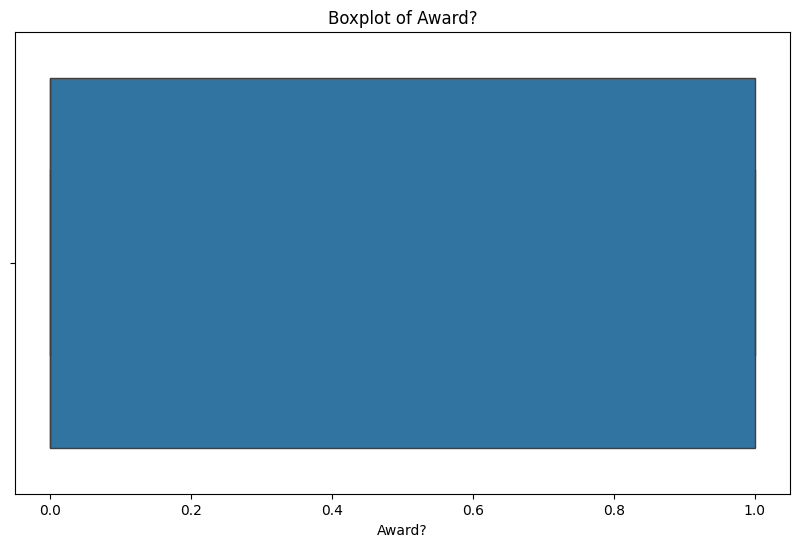

In [10]:
# Boxplot
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**Implementing Clustering Algorithms:**

1.Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

2.Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

**K-Means Cluster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


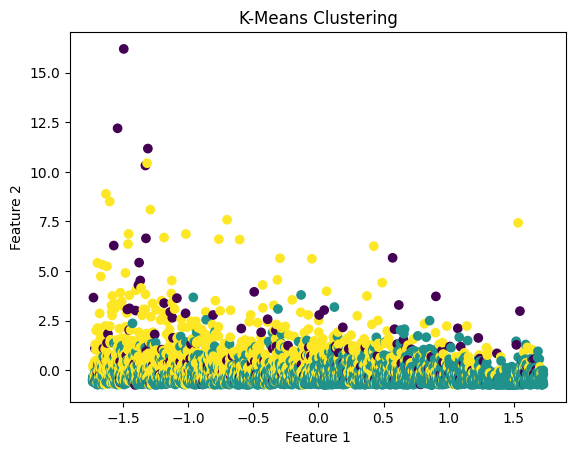

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans# Select numeric columns and scale the data
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])
# Implement K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(scaled_data)
# Add cluster labels to the original data
data['KMeans_Cluster'] = kmeans_labels
# Visualize the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Hierarchical Clustering (Agglomerative Clustering)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


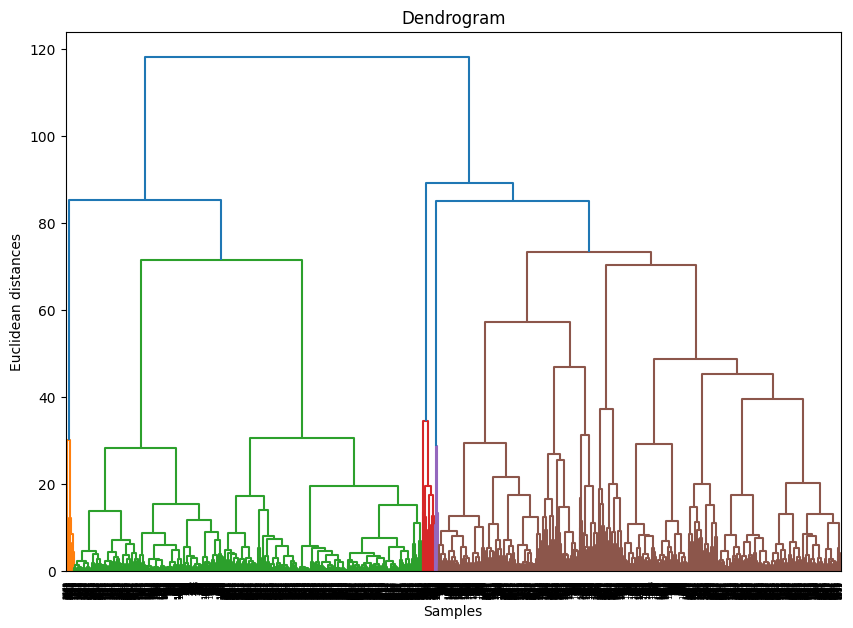

In [12]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
# Implement Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  # Adjust n_clusters as needed
hc_labels = hc.fit_predict(scaled_data)
# Add cluster labels to the original data
data['Hierarchical_Cluster'] = hc_labels
# Visualize the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


**DB Scan**

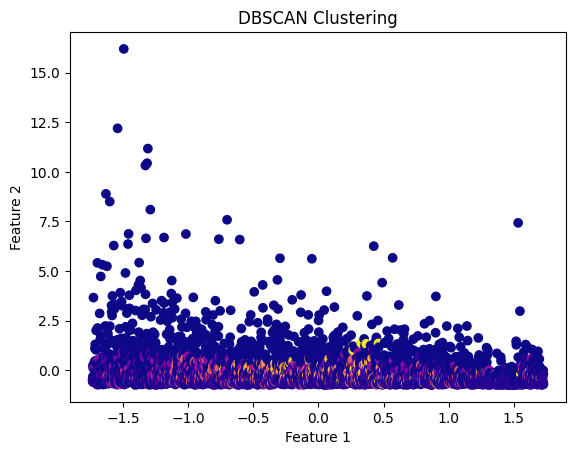

In [13]:
from sklearn.cluster import DBSCAN
# Implement DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(scaled_data)
# Add cluster labels to the original data
data['DBSCAN_Cluster'] = dbscan_labels
# Visualize the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

3. Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

**1. K-Means: Using the Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

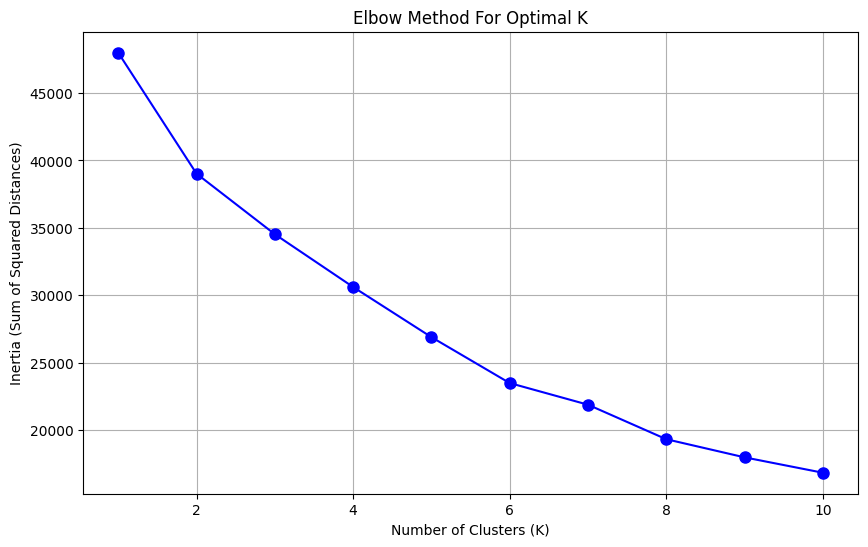

In [14]:
# Apply the Elbow Method to find the optimal K
inertia = []
K_range = range(1, 11)  # Try different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

**2. Hierarchical Clustering: Experimenting with Different Linkage Criteria**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


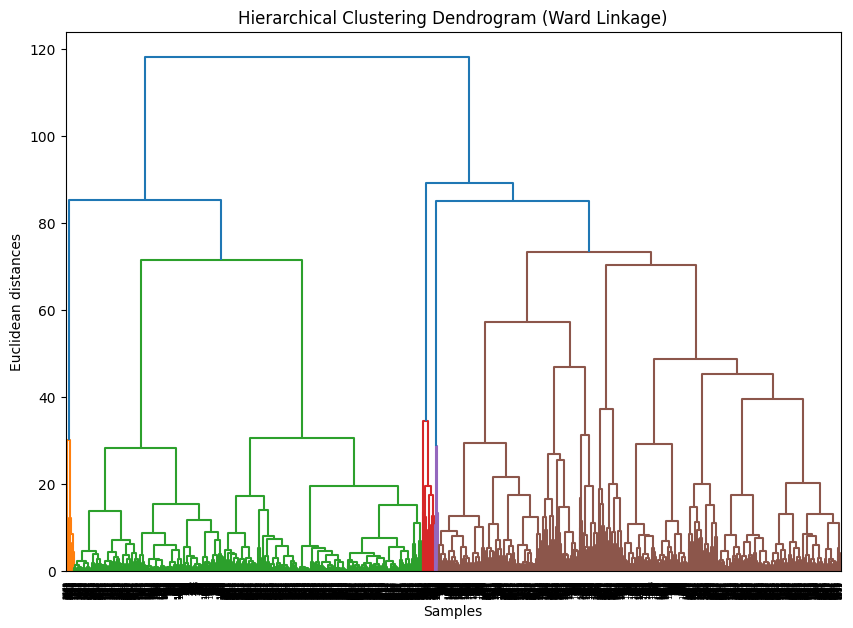

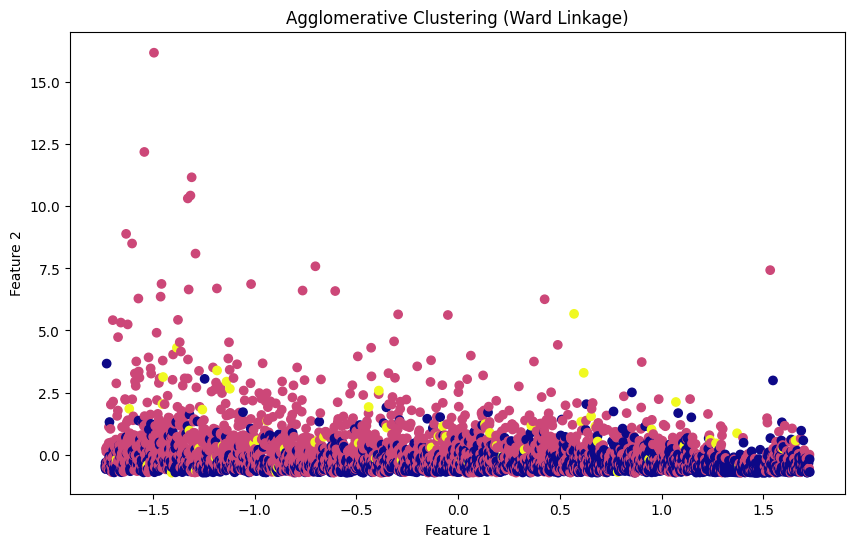

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


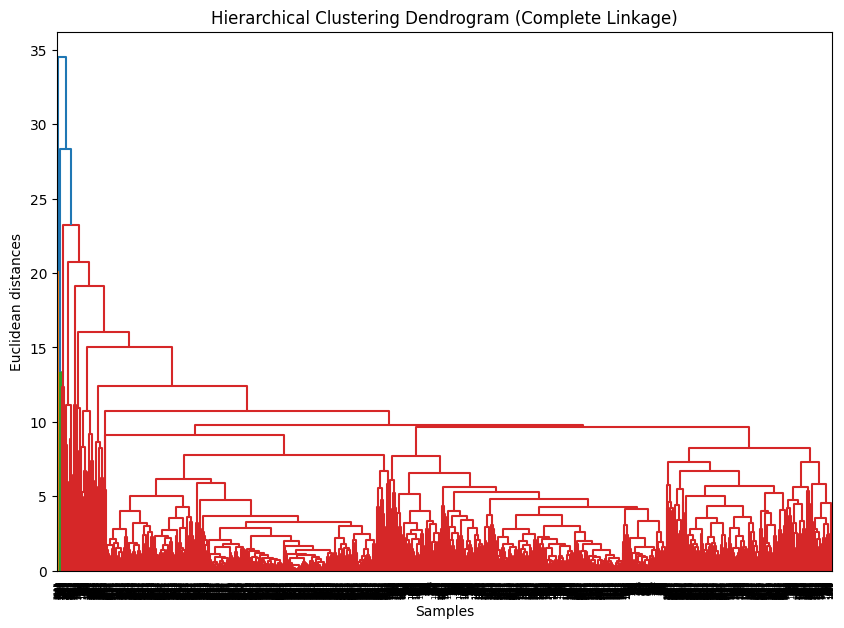

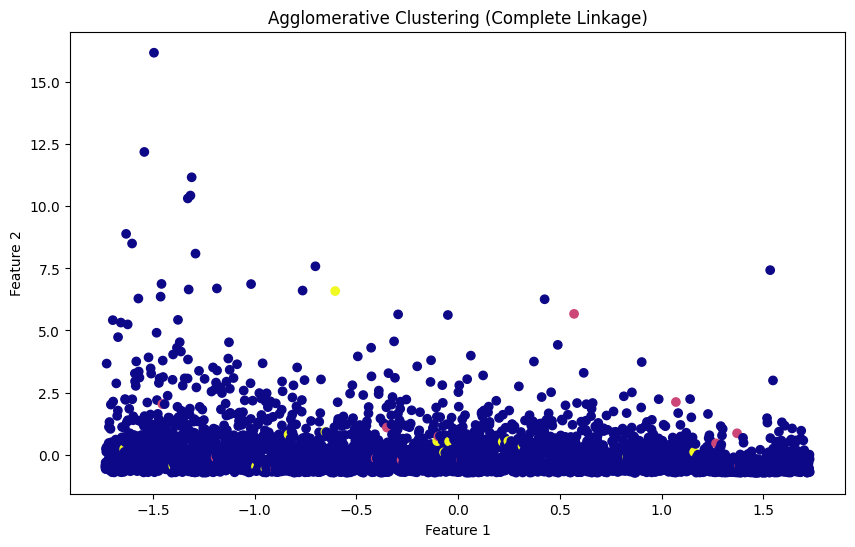

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


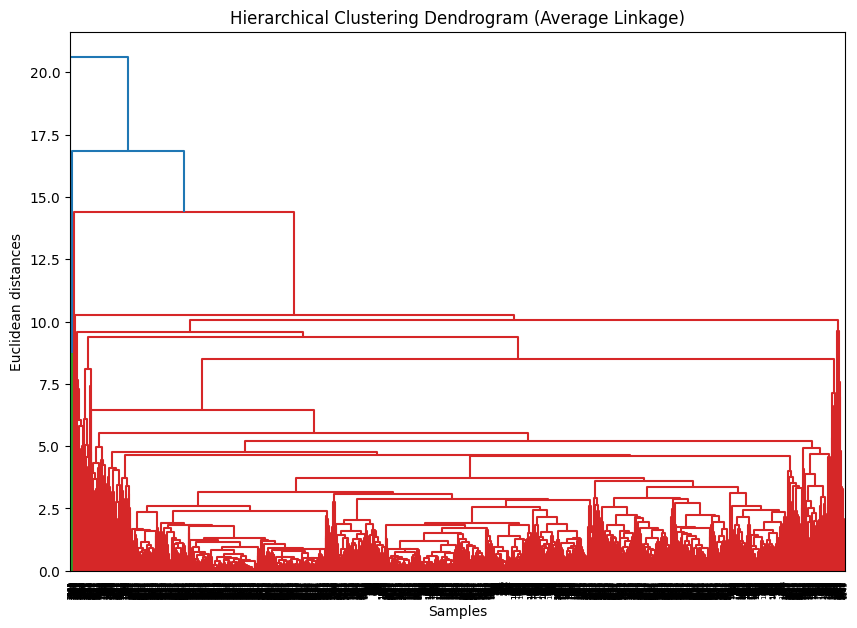

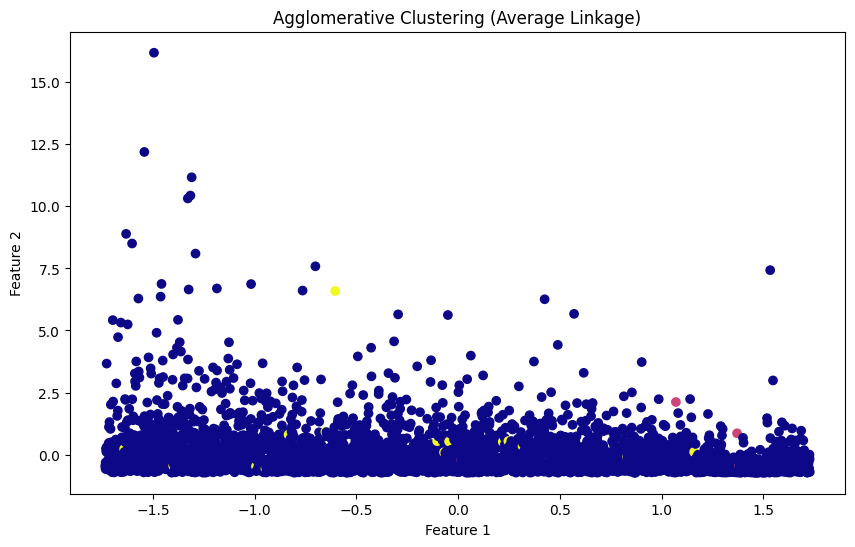

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


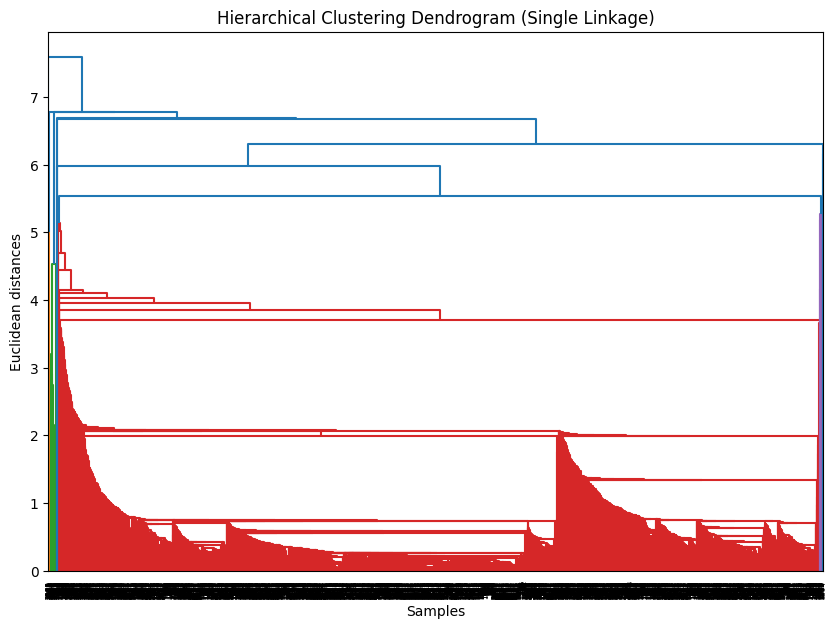

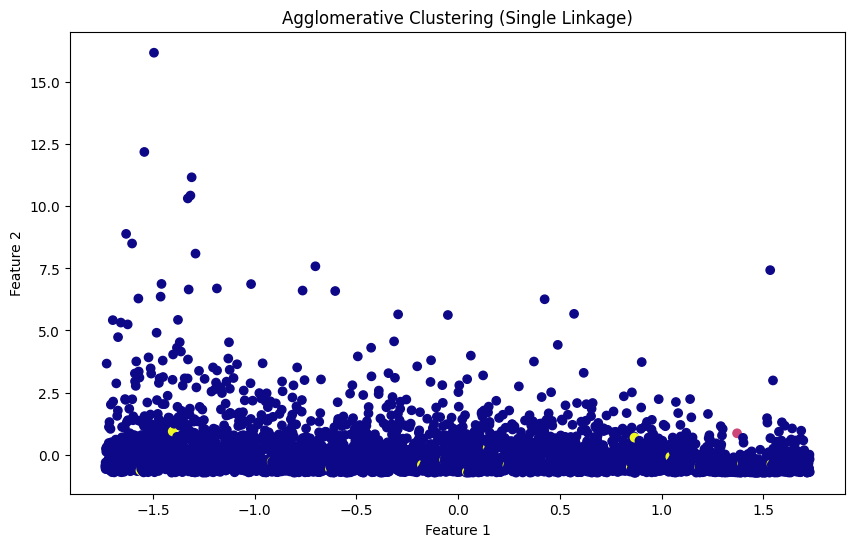

In [15]:
import scipy.cluster.hierarchy as sch
# Try different linkage methods: 'ward', 'complete', 'average', 'single'
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    # Apply Agglomerative Clustering
    hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=method)
    hc_labels = hc.fit_predict(scaled_data)
    # Plot dendrogram for each method
    plt.figure(figsize=(10, 7))
    linked = sch.linkage(scaled_data, method=method)
    dendrogram = sch.dendrogram(linked)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean distances')
    plt.show()
    # Plot clusters for visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hc_labels, cmap='plasma')
    plt.title(f'Agglomerative Clustering ({method.capitalize()} Linkage)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

**3. DBSCAN: Experimenting with Different eps and min_samples**

DBSCAN with eps=0.3, min_samples=3 produced 77 clusters


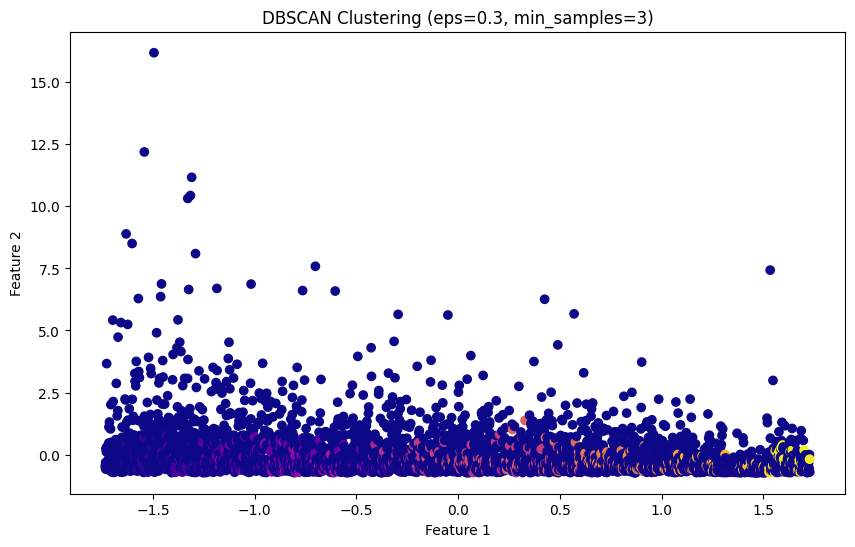

DBSCAN with eps=0.3, min_samples=5 produced 27 clusters


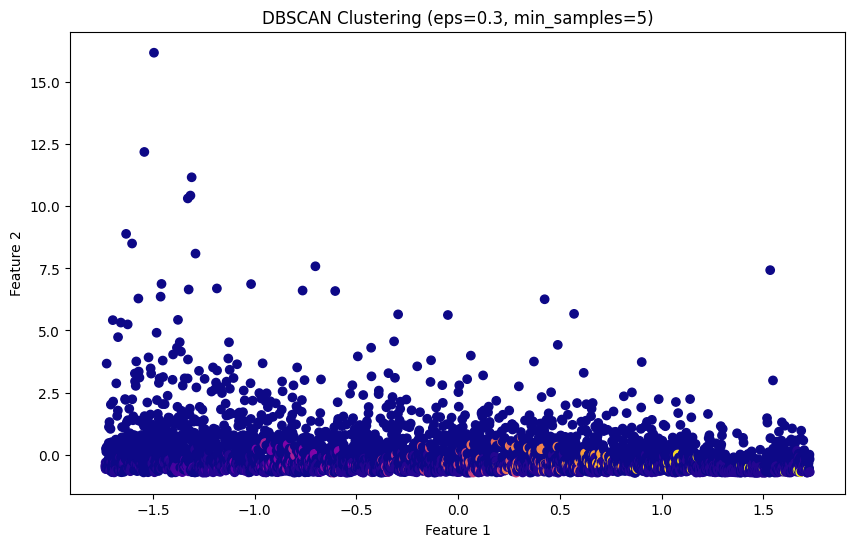

DBSCAN with eps=0.3, min_samples=7 produced 9 clusters


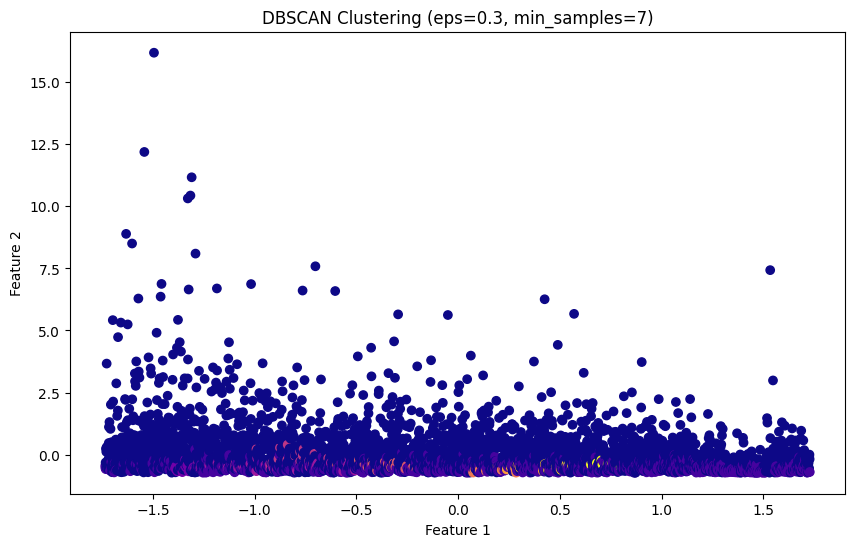

DBSCAN with eps=0.3, min_samples=10 produced 6 clusters


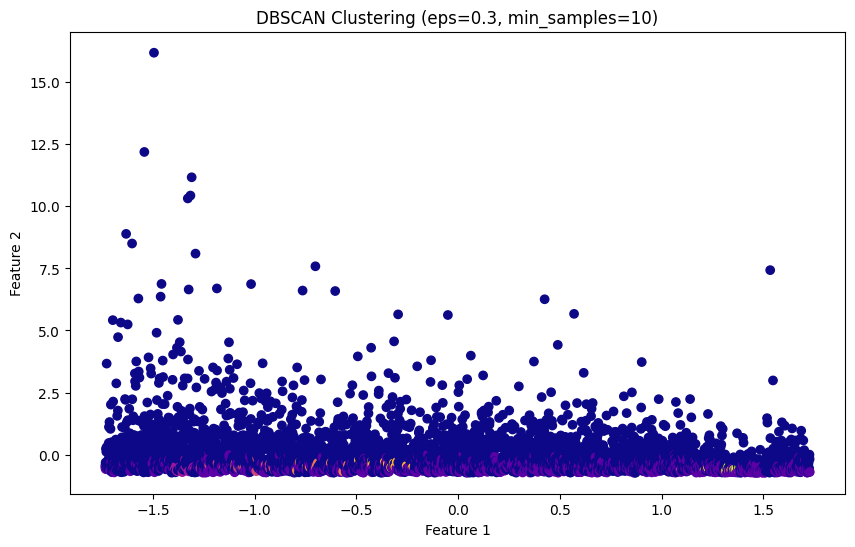

DBSCAN with eps=0.5, min_samples=3 produced 59 clusters


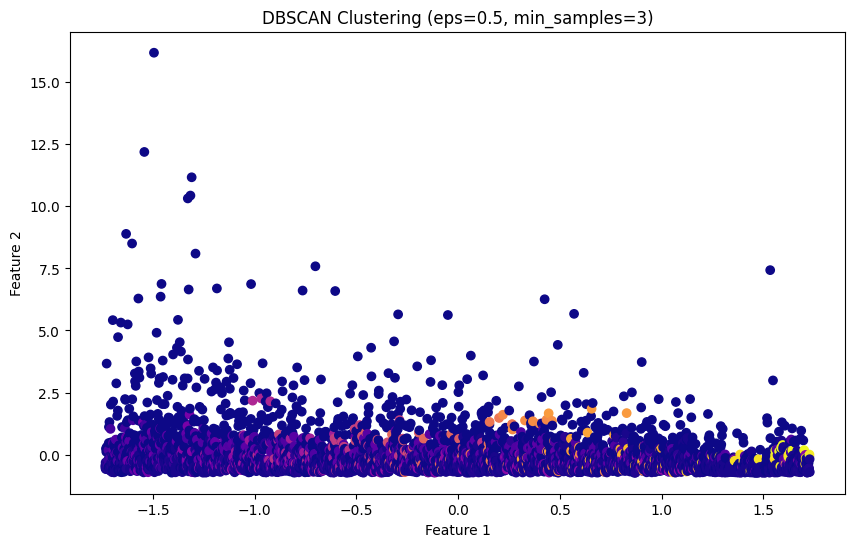

DBSCAN with eps=0.5, min_samples=5 produced 23 clusters


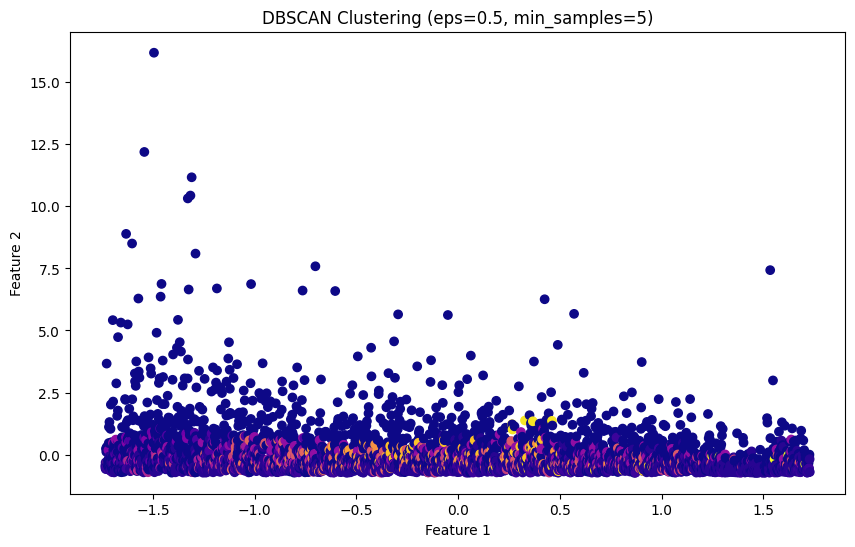

DBSCAN with eps=0.5, min_samples=7 produced 15 clusters


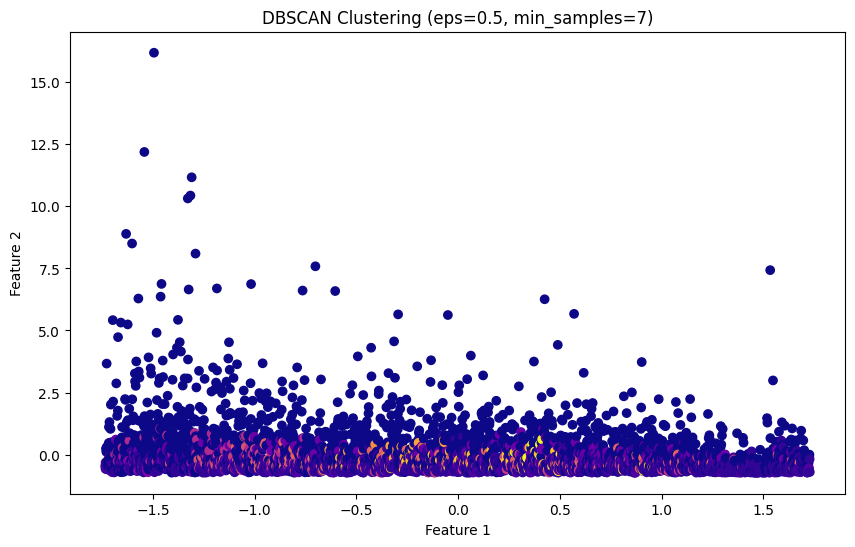

DBSCAN with eps=0.5, min_samples=10 produced 12 clusters


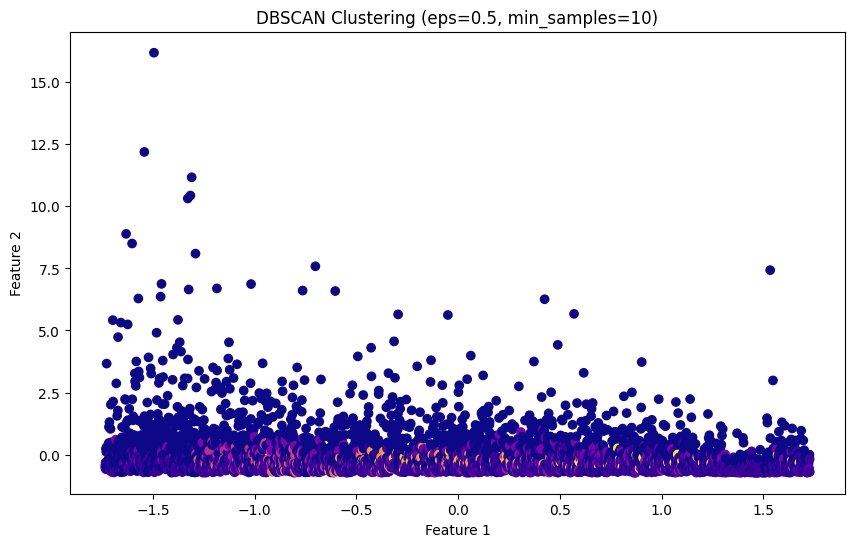

DBSCAN with eps=0.7, min_samples=3 produced 34 clusters


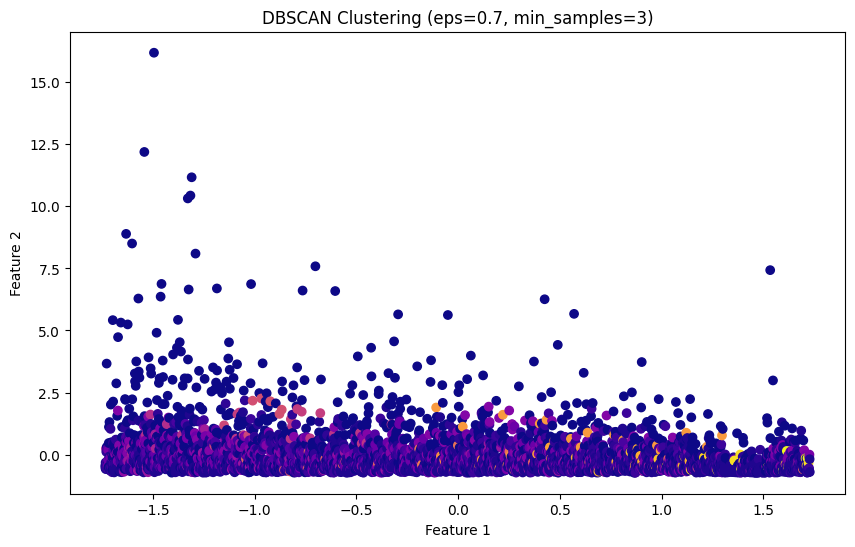

DBSCAN with eps=0.7, min_samples=5 produced 17 clusters


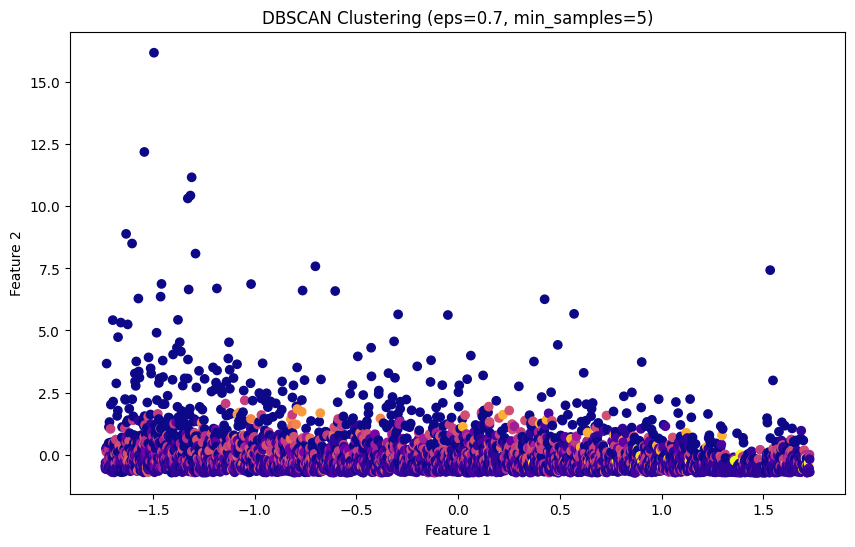

DBSCAN with eps=0.7, min_samples=7 produced 11 clusters


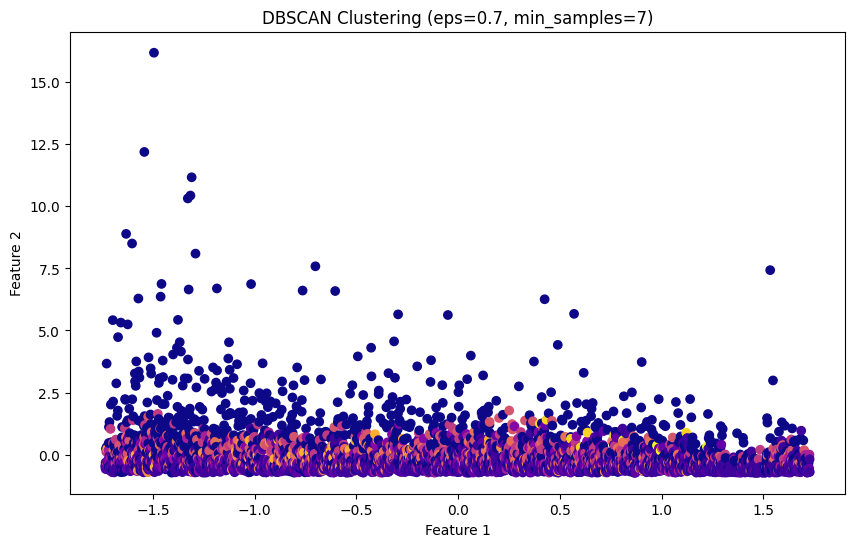

DBSCAN with eps=0.7, min_samples=10 produced 10 clusters


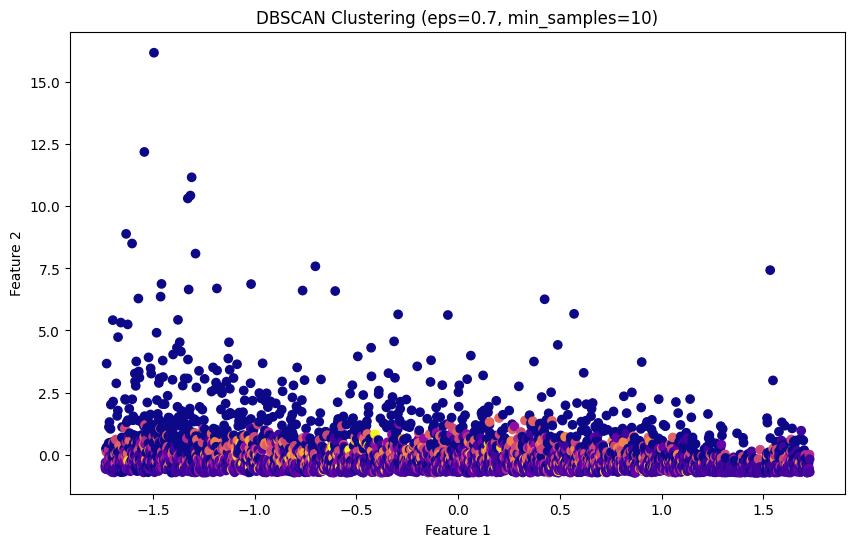

DBSCAN with eps=0.9, min_samples=3 produced 15 clusters


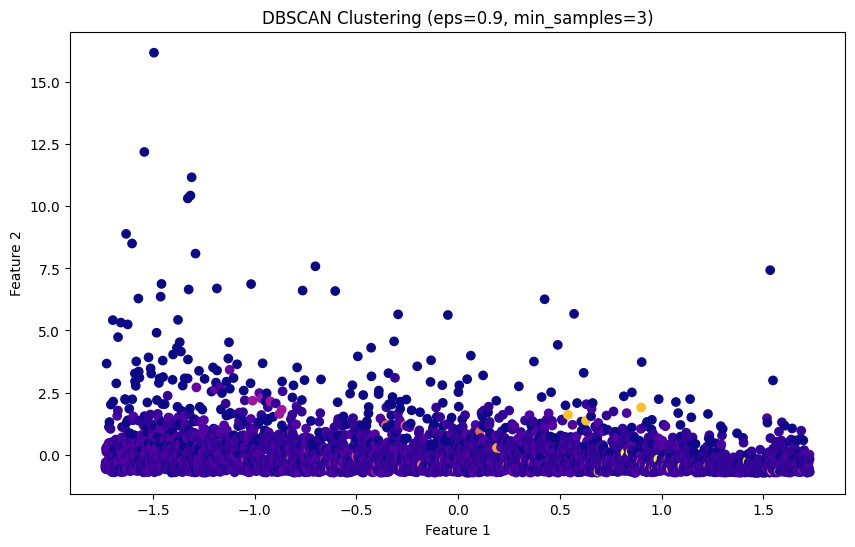

DBSCAN with eps=0.9, min_samples=5 produced 6 clusters


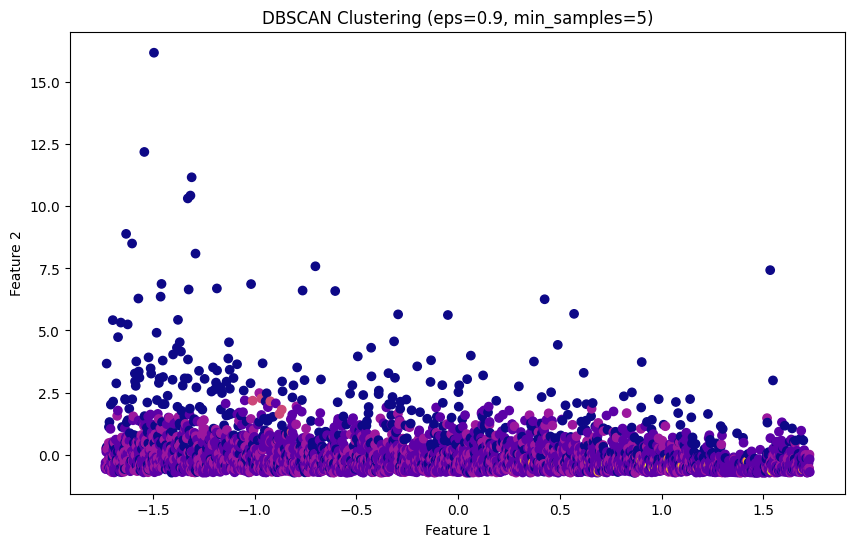

DBSCAN with eps=0.9, min_samples=7 produced 5 clusters


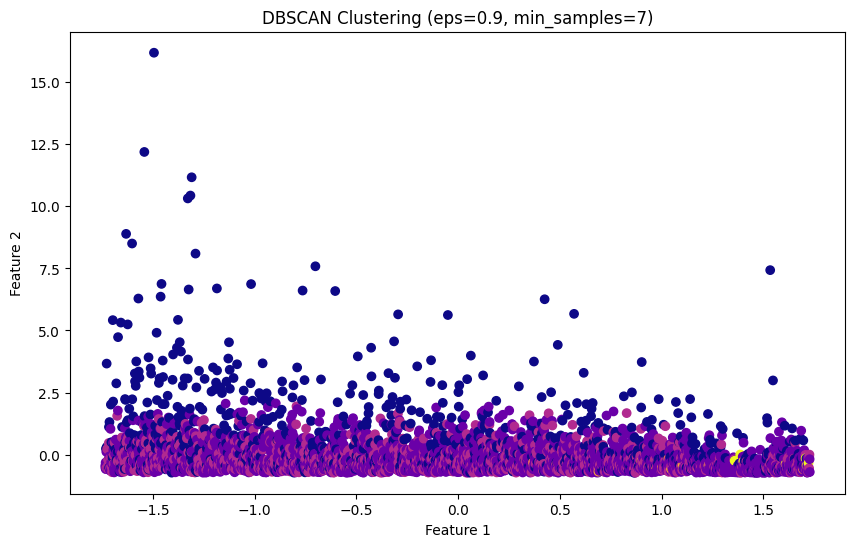

DBSCAN with eps=0.9, min_samples=10 produced 2 clusters


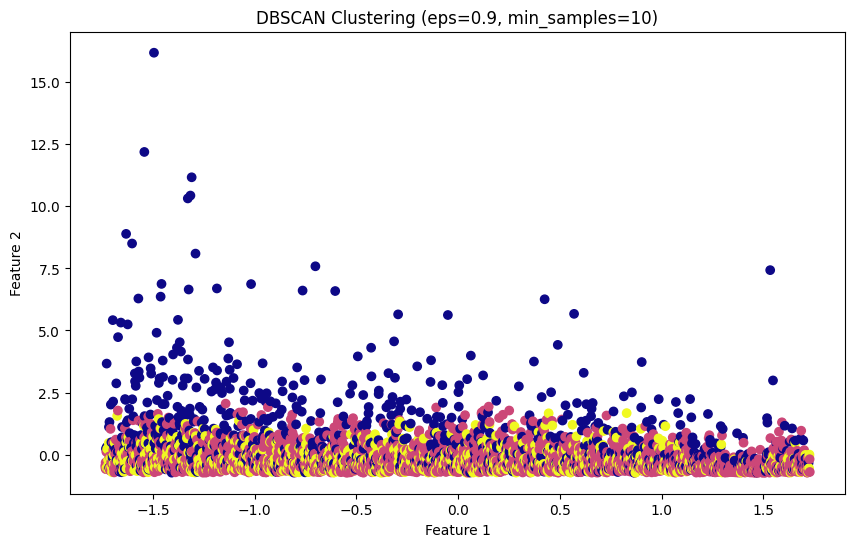

In [16]:
# Define different values of eps and min_samples
eps_values = [0.3, 0.5, 0.7, 0.9]
min_samples_values = [3, 5, 7, 10]
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_data)
        # Count unique clusters
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        print(f'DBSCAN with eps={eps}, min_samples={min_samples} produced {n_clusters} clusters')
        # Plot clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='plasma')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

**Davies-Bouldin Index**

In [18]:
from sklearn.metrics import davies_bouldin_score
# Evaluate K-Means
kmeans_dbi = davies_bouldin_score(scaled_data, kmeans_labels)
print(f'Davies-Bouldin Index for K-Means: {kmeans_dbi}')
# Evaluate Hierarchical Clustering
hc_dbi = davies_bouldin_score(scaled_data, hc_labels)
print(f'Davies-Bouldin Index for Hierarchical Clustering: {hc_dbi}')
# Evaluate DBSCAN (Exclude noise points)
dbscan_dbi = davies_bouldin_score(scaled_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f'Davies-Bouldin Index for DBSCAN: {dbscan_dbi}')

Davies-Bouldin Index for K-Means: 1.4940223212382013
Davies-Bouldin Index for Hierarchical Clustering: 0.29366354904441266
Davies-Bouldin Index for DBSCAN: 1.6212688398440447


**Cluster Analysis and Interpretation:**

### Analysis of Clusters Generated by Each Clustering Algorithm

#### 1. **K-Means Clustering**
- **Cluster Distribution**: K-Means partitions the data into `k` clusters of roughly equal size. Each cluster is represented by its centroid, and points are assigned to the nearest centroid.

- **Characteristics**: The clusters tend to be spherical due to the nature of Euclidean distance minimization. K-Means is sensitive to the initial selection of centroids, and different initializations might lead to different clusters.

- **Insights**:
  - Clusters are well-defined when the data has clear groupings.
  - If the Elbow Method shows a distinct "elbow," the number of clusters is well-defined.
  - Variance within clusters is minimized, making K-Means effective for compact, spherical data distributions.

#### 2. **Hierarchical Clustering**
- **Cluster Distribution**: Hierarchical Clustering produces a dendrogram that represents the data's nested grouping structure. The number of clusters can be chosen by cutting the dendrogram at a particular level.

- **Characteristics**: Different linkage methods (e.g., Ward, Complete) produce different cluster shapes. For instance, Ward’s method tends to create compact clusters, while Single linkage might result in elongated clusters.

- **Insights**:
  - Suitable for small to medium-sized datasets due to computational intensity.
  - Reveals the hierarchical structure of data, showing how clusters merge at various levels.
  - Effective for understanding nested or hierarchical relationships between data points.

#### 3. **DBSCAN Clustering**
- **Cluster Distribution**: DBSCAN identifies clusters based on density, with core points having a dense neighborhood and border points being connected to core points. Noise points that don’t fit into any cluster are labeled as outliers.

- **Characteristics**: DBSCAN can find clusters of arbitrary shape and handle noise effectively. It does not require specifying the number of clusters upfront but is sensitive to the choice of eps and min_samples.

- **Insights**:
  - Works well with datasets containing clusters of varying shapes and densities.
  - Effectively identifies and excludes noise, providing cleaner clusters.
  - Ideal for datasets where the number of clusters is not well-defined or when the data contains noise.

### Comparative Insights

- **K-Means** is most effective when the data is spherical and well-separated. It provides consistent clusters but might struggle with outliers and non-spherical distributions.
- **Hierarchical Clustering** offers a detailed, multi-level perspective on how data points are related at various granularity levels, making it useful for exploratory analysis.
- **DBSCAN** excels in identifying clusters of varying shapes and densities and is robust against noise. However, it requires careful tuning of parameters (eps and min_samples).


**Visualization:**

  1.Visualize the clustering results using scatter plots,Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

In [22]:
from sklearn.decomposition import PCA
# Preprocessing: Scaling the data
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


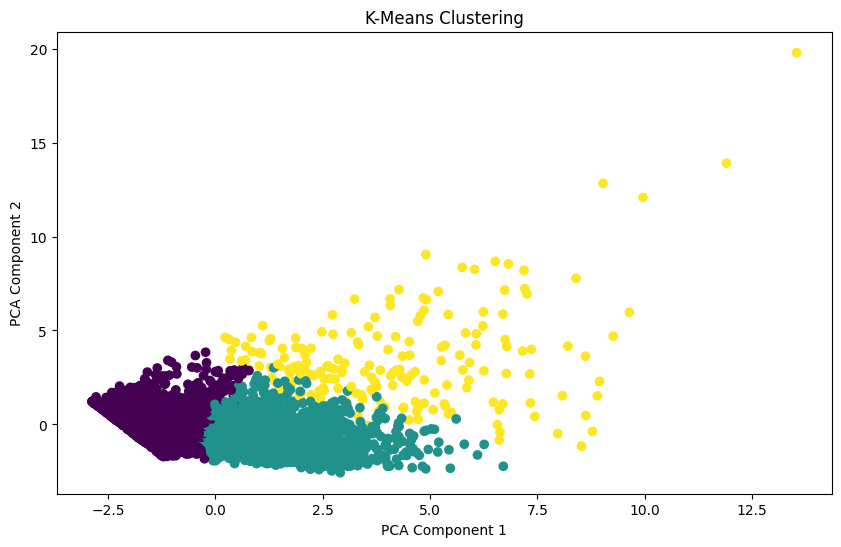

In [23]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
# Scatter plot for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


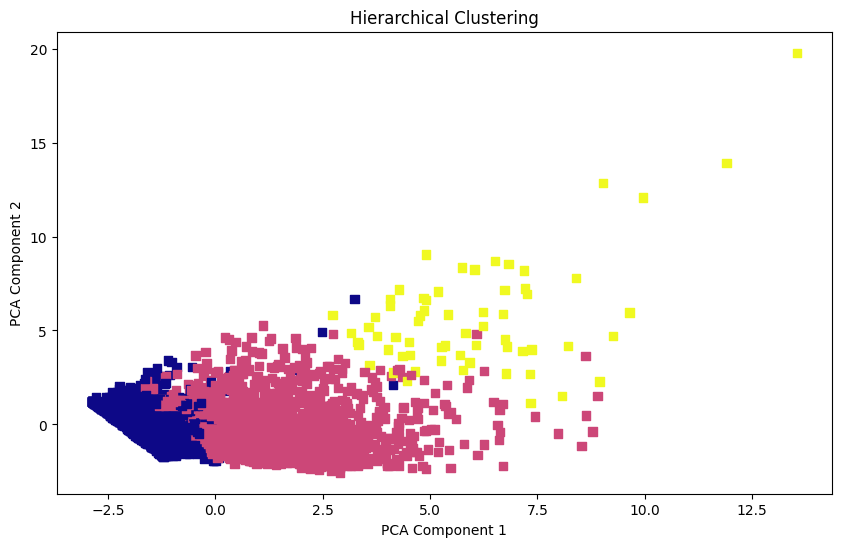

In [24]:
# 2. Hierarchical Clustering (Agglomerative)
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_data)
# Scatter plot for Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hc_labels, cmap='plasma', marker='s')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

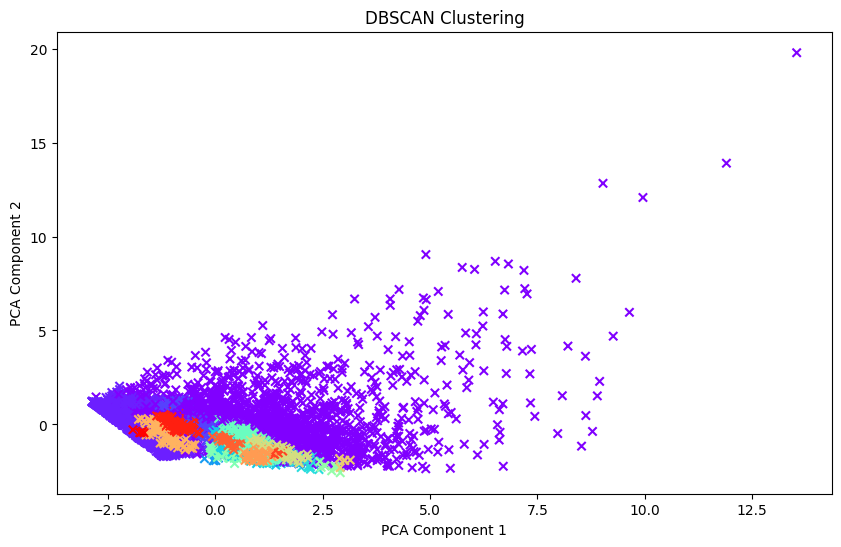

In [25]:
# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
# Scatter plot for DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='rainbow', marker='x')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**Evaluation and Performance Metrics:**

**Silhouette Score**

In [26]:
from sklearn.metrics import silhouette_score
# Evaluate K-Means
kmeans_score = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_score}')
# Evaluate Hierarchical Clustering
hc_score = silhouette_score(scaled_data, hc_labels)
print(f'Silhouette Score for Hierarchical Clustering: {hc_score}')
# Evaluate DBSCAN (Note: Ignore noise points labeled as -1)
dbscan_score = silhouette_score(scaled_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f'Silhouette Score for DBSCAN: {dbscan_score}')

Silhouette Score for K-Means: 0.2731575549348844
Silhouette Score for Hierarchical Clustering: 0.2609742866066266
Silhouette Score for DBSCAN: 0.2867062812292546
